In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


from prml.utils.datasets import load_mnist,load_iris
from prml.continuous_latent_variables import (
    PCA,
    ProbabilisticPCA,
    ProbabilisticPCAbyEM,
    FactorAnalysis
)

# PCA

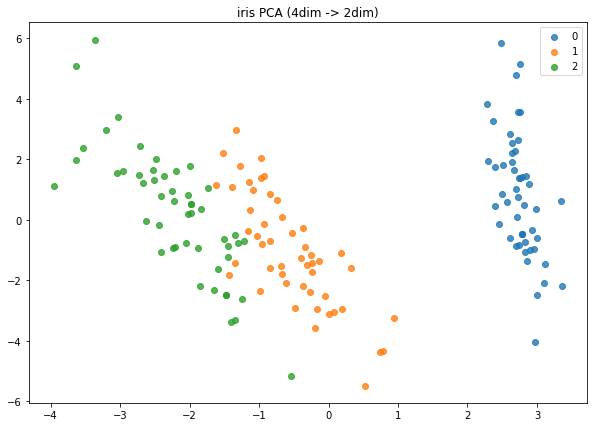

In [2]:
X,y = load_iris()
pca = PCA()
X_proj = pca.fit_transform(X,2,whitening=True)

fig,axes = plt.subplots(1,1,figsize=(10,7))
for idx,label in enumerate(np.unique(y)):
    axes.scatter(x=X_proj[y == label,0],
                y=X_proj[y == label,1],
                alpha=0.8,
                label=label)
axes.set_title("iris PCA (4dim -> 2dim)")
plt.legend()
plt.show()

### mnist image compression

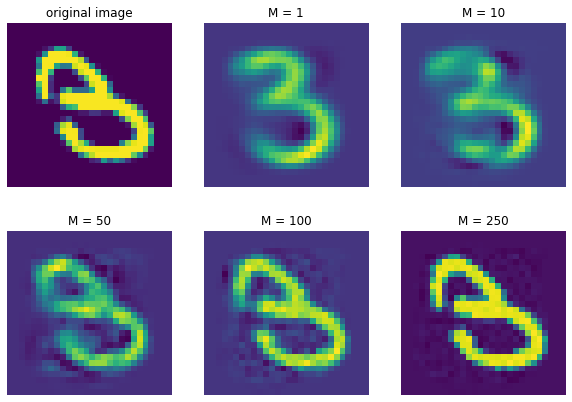

In [3]:
X,y  = load_mnist([3])
X = X[:600].reshape(-1,28*28)
X_mean = X.mean(axis=0)

pca = PCA() 
pca.fit(X)
img = X[0]
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(231)
ax.imshow(img.reshape(28,28))
ax.set_title("original image")
ax.axis("off")

img = img.ravel()
weight = pca.weight
approximate = np.dot(weight.T,img - X_mean)*weight
for n,M in enumerate([1,10,50,100,250]):
    ax = fig.add_subplot(int(f"23{n+2}"))
    img_proj = X_mean + np.sum(approximate[:,:M],axis = 1)
    i,j = (n+1)//2,(n+1)%3
    ax.imshow(img_proj.reshape(28,28))
    ax.set_title(f"M = {M}")
    ax.axis("off")

plt.show()

# Probabilistic PCA

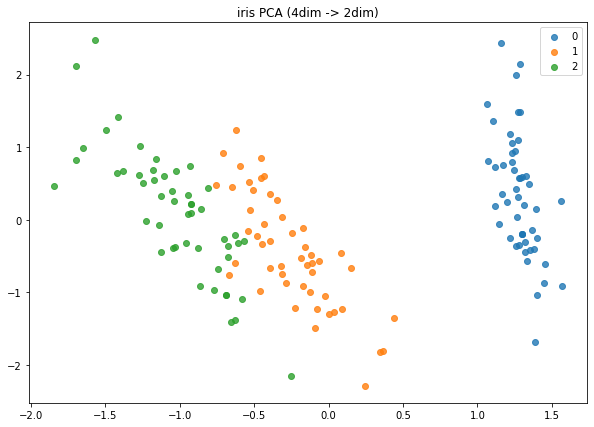

In [4]:
X,y = load_iris()
ppca = ProbabilisticPCA()
X_proj = ppca.fit_transform(X,2)

fig,axes = plt.subplots(1,1,figsize=(10,7))
for idx,label in enumerate(np.unique(y)):
    axes.scatter(x=X_proj[y == label,0],
                y=X_proj[y == label,1],
                alpha=0.8,
                label=label)
axes.set_title("iris PCA (4dim -> 2dim)")
plt.legend()
plt.show()

# Probabilistic PCA by EM

You can find appropriate `M` by EM algorithum

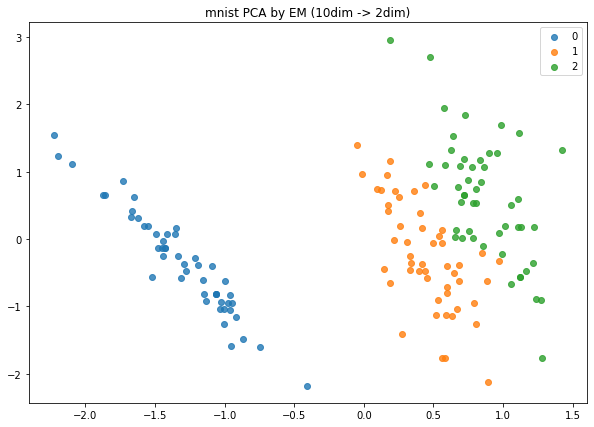

In [5]:
X,y = load_iris()
em = ProbabilisticPCAbyEM(max_iter=1000)
X_proj = em.fit_transform(X,4,find_M=True)
M = X_proj.shape[1]

if M == 1:
    fig,ax = plt.subplots(1,1,figsize=(10,7))
    for idx,label in enumerate(np.unique(y)):
        ax.hist(x=X_proj[y == label,0],
                alpha=0.8,
                label=label)
    ax.set_title("iris PCA by EM (4dim -> 1dim)")
    plt.legend()
    plt.show()

elif M == 2:
    fig,axes = plt.subplots(1,1,figsize=(10,7))
    for idx,label in enumerate(np.unique(y)):
        axes.scatter(x=X_proj[y == label,0],
                    y=X_proj[y == label,1],
                    alpha=0.8,
                    label=label)
    axes.set_title("mnist PCA by EM (10dim -> 2dim)")
    plt.legend()
    plt.show()

else:
    print(f"M = {M} >= 3 ...")

# Factor Analysis

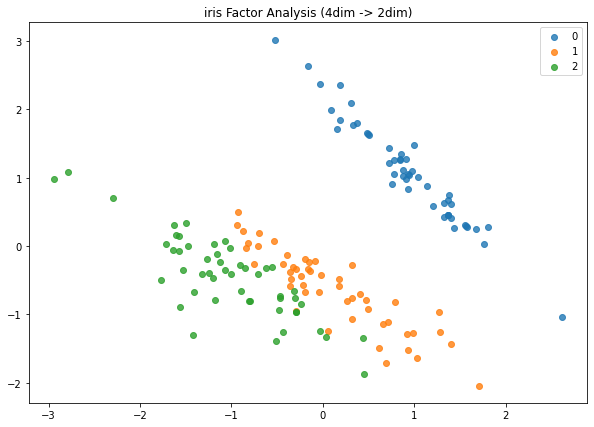

In [6]:
X,y = load_iris() 
fa = FactorAnalysis() 
X_proj = fa.fit_transform(X,M=2)

fig,axes = plt.subplots(1,1,figsize=(10,7))
for idx,label in enumerate(np.unique(y)):
    axes.scatter(x=X_proj[y == label,0],
                y=X_proj[y == label,1],
                alpha=0.8,
                label=label)
axes.set_title("iris Factor Analysis (4dim -> 2dim)")
plt.legend()
plt.show()